## Midterm 2: Assignment 3
### Author: Dumitru Ana-Maria

## Importing the Libraries

In [ ]:
import numpy as np
from tensorflow.keras.datasets import mnist
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

## Implementing the Restricted Boltzmann Machine (RBM)


In [ ]:
class RBM:
  def __init__(self, hidden, visible, learningRate=0.1):
    """
      A Restricted Boltzmann Machine with one hidden layer and a set learning
      rate of 0.1. The weights are going to be initialized with random values
      multiplied by the learning rate, and the biases for the visible and hidden
      layers will be zero matrices

      :param hidden: the number of hidden states
      :param visible: the number of visible states
    """
    self.__hidden = hidden
    self.__visible = visible
    self.learningRate = learningRate

    self.__weights = np.random.randn(visible, hidden) * 0.1
    self.__visibleBias = np.zeros(visible)
    self.__hiddenBias = np.zeros(hidden)

  def sigmoid(self, x):
      """
        The sigmoid function, used for activation
      """
      return 1/(1+np.exp(-x))

  def samplingHiddenGivenVisible(self, visible):
      """
        Gibbs sampling for the hidden values, given the visible probabilities
        :param visible: the probabilities for the visible values
        :return: the hidden
         probabilities and a
      """
      hiddenActivation = np.dot(visible, self.__weights) + self.__hiddenBias
      hiddenProbabilities = self.sigmoid(hiddenActivation)
      return hiddenProbabilities

  def samplingVisibleGivenHidden(self, hidden):
      """
        Gibbs sampling for the visible values, given the hidden probabilities
        :param hidden: the probabilities for the hidden values
        :return: the visible probabilities and a sample drawn from a binomial
        distribution for the visible probabilities
      """
      visibleActivation = np.dot(hidden, np.transpose(self.__weights)) + self.__visibleBias
      visibleProbabilities = self.sigmoid(visibleActivation)
      return visibleProbabilities

  def contrastiveDivergence1(self, dataOr):
      """
        Contrasting Divergence Learning (CD1) for giving an approximation
        of the gradient of the log-likelihood (crude approx.) or of the Contrastive
        Divergence object function (more closely approx.)
        :param dataOr: the original, normalized data
      """
      # Step 1: Wake part
      data = (dataOr > np.random.uniform(size = dataOr.shape))*1 # multiplied by 1 to convert from Boolean type into integers
      positiveHiddenProb = self.samplingHiddenGivenVisible(data)
      wake = np.transpose(data) @ positiveHiddenProb

      # Step 2: Dream part
      positiveHiddenState = (positiveHiddenProb > np.random.uniform(size = positiveHiddenProb.shape))*1
      reconstructedDataProb = self.samplingVisibleGivenHidden(positiveHiddenState)
      reconstructedData = (reconstructedDataProb > np.random.uniform(size = data.shape))*1
      negativeHiddenProb = self.samplingHiddenGivenVisible(reconstructedData)
      dream = np.transpose(reconstructedData) @ negativeHiddenProb

      # Step 3: Reconstruction error
      err = np.sum(np.sum(np.power((data - reconstructedData),2)))

      # Step 4: CD1 Update
      deltaWeights = wake - dream
      deltaBiasHidden = np.sum(positiveHiddenProb) - np.sum(negativeHiddenProb)
      deltaBiasVisible = np.sum(data) - np.sum(reconstructedData)

      self.__weights += deltaWeights * self.learningRate
      self.__hiddenBias += deltaBiasHidden * self.learningRate
      self.__visibleBias += deltaBiasVisible * self.learningRate

      return err

  def train(self, data, epochs, batchSize):
    """
        Training function for the RBM: sample the data into batches and apply the Contrastive Divergence Learning
        on each one of them
        :param data: the data used for training
        :param epoch: the number of times the training will take place
        :param bachSize: how large should the batch be
    """
    numberOfSamples = data.shape[0]

    for epoch in range(epochs):
        print("Epoch {}:".format(epoch+1))
        for i, batchStart in enumerate(range(0, numberOfSamples, batchSize)):
            batchEnd = min(batchStart + batchSize, numberOfSamples)
            batch = data[batchStart:batchEnd]
            err = self.contrastiveDivergence1(batch)
            if i % 250 == 0:
              print("Error batch: {}".format(err))
        print("Epoch {} completed".format(epoch+1))
        print("\n")

  def encode(self, data):
      """
          Function to encode the original image
      """
      hiddenStates = self.samplingHiddenGivenVisible(data)
      return hiddenStates

  def reconstruct(self, hiddenStates):
      """
          Function to reconstruct the original image
      """
      visibleProbabilities = self.samplingVisibleGivenHidden(hiddenStates)
      return visibleProbabilities

## Training the Algorithm On the MNIST Dataset

In [ ]:
# Step 1: Load the data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Step 2: Flatten the image
X_train = X_train.reshape(-1, 784).astype('float32') / 255.0
X_test = X_test.reshape(-1, 784).astype('float32') / 255.0

# Step 3: Train RBM
rbm1 = RBM(256, 784, 1e-3)

In [ ]:
rbm1.learningRate = 1e-3
rbm1.train(X_train, 10, 64)

Epoch 1:
Error batch: 24777
Error batch: 5335
Error batch: 5401
Error batch: 5172
Epoch 1 completed


Epoch 2:
Error batch: 3602
Error batch: 3536
Error batch: 3681
Error batch: 4347
Epoch 2 completed


Epoch 3:
Error batch: 3340
Error batch: 4377
Error batch: 3343
Error batch: 3864
Epoch 3 completed


Epoch 4:
Error batch: 2928
Error batch: 2977
Error batch: 3048
Error batch: 3986
Epoch 4 completed


Epoch 5:
Error batch: 2965
Error batch: 2919
Error batch: 3070
Error batch: 3474
Epoch 5 completed


Epoch 6:
Error batch: 2820
Error batch: 2815
Error batch: 3055
Error batch: 3107
Epoch 6 completed


Epoch 7:
Error batch: 2723
Error batch: 2725
Error batch: 2873
Error batch: 3015
Epoch 7 completed


Epoch 8:
Error batch: 2718
Error batch: 2626
Error batch: 2775
Error batch: 3139
Epoch 8 completed


Epoch 9:
Error batch: 2628
Error batch: 2657
Error batch: 2856
Error batch: 3074
Epoch 9 completed


Epoch 10:
Error batch: 2552
Error batch: 2603
Error batch: 2823
Error batch: 2934
Epoch 10

- For learning rate **1e-4**, 10 epochs and batch size 64, the error per batch decreases, in the beginning extremely fast (from 24491 to 7034), later on slower, until it reaches values around 3200.
- For learning rate **1e-6**, it does not decrease so abruptly as for the case where the learning rate was 1e-4. It's a smoother process and the minimum value was 7748.
- For learning rate equal to **1e-3**, we manage to lower the error to as low as 2552, and the difference between the first error from the first batch and the second one is significant (from 24284 to 5411).
- For learning rate **1e-2**, I get the following warning somewhere in the first epoch:

< ipython-input-64-b09bf646c5d8 >:24: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-x))

This means that, at some point, the value given as input for the sigmoid function was too large for np.float64 to handle.

The lowest error is 4376, but the its fluctuation in an epoch is quite significant (from values close to 6000 to 4000 and back to 5000 in the 6th epoch, when it should have already shown some signs of "stability").

Taking everything into consideration, for the next part of the assignment I will keep the learning rate equal to 1e-3.

We are now going to create a new RBM with less hidden states (64) and train it for 10 epochs, with a batch size of 64 and learning rate 1e-3 (same as before):

In [ ]:
# Creating and training another RBM, with less hidden layers
rbm2 = RBM(64, 784, 1e-3)
rbm2.train(X_train, 10, 64)

Epoch 1:
Error batch: 24845
Error batch: 8753
Error batch: 6557
Error batch: 6145
Epoch 1 completed


Epoch 2:
Error batch: 5705
Error batch: 6339
Error batch: 5832
Error batch: 6472
Epoch 2 completed


Epoch 3:
Error batch: 4837
Error batch: 5586
Error batch: 5455
Error batch: 6373
Epoch 3 completed


Epoch 4:
Error batch: 4673
Error batch: 5391
Error batch: 5394
Error batch: 6309
Epoch 4 completed


Epoch 5:
Error batch: 4631
Error batch: 5173
Error batch: 5291
Error batch: 6377
Epoch 5 completed


Epoch 6:
Error batch: 4557
Error batch: 5218
Error batch: 5266
Error batch: 6378
Epoch 6 completed


Epoch 7:
Error batch: 4549
Error batch: 5054
Error batch: 5299
Error batch: 6328
Epoch 7 completed


Epoch 8:
Error batch: 4553
Error batch: 5227
Error batch: 5247
Error batch: 6398
Epoch 8 completed


Epoch 9:
Error batch: 4570
Error batch: 4968
Error batch: 5252
Error batch: 6352
Epoch 9 completed


Epoch 10:
Error batch: 4504
Error batch: 4982
Error batch: 5058
Error batch: 6342
Epoch 10

There is a clear difference in the two RBMs: the error decreases slower for rbm2 than for rbm1 and the minimum value that it reaches is 4504. Let's encode some images and visually check its performance.

## Encoding Some Test Images

We will use the first RBM (rbm1) for encoding and reconstructing the images:

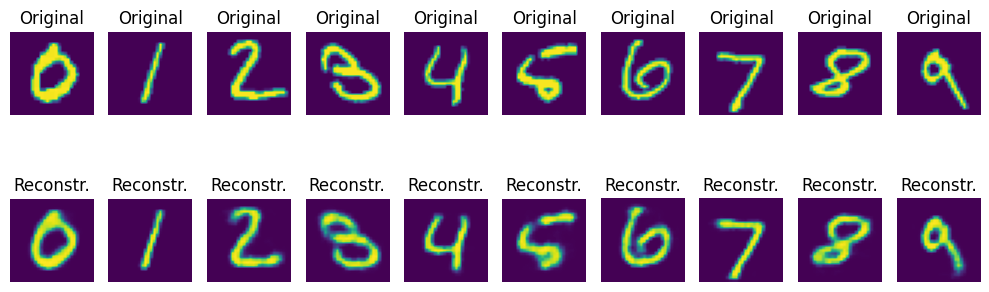

In [ ]:
# Step 1: Choosing the images, encoding them and, afterwards, reconstructing them.
testImages1 = X_test
testImagesEncoded1 = rbm1.encode(testImages1)
testImagesReconstructed1 = rbm1.reconstruct(testImagesEncoded1)

# Step 2: Plotting the results
plt.figure(figsize=(10, 4))
for i in range(10):
  # I want to plot one image for every digit in the dataset and its reconstructed version => 20 images
  for j, label in enumerate(y_test):
    # j = index of the image
    # label = label of the image
    if i == label:
      # If we find a label for a digit that has not been plotted yet, we plot the original and, below it, the reconstructed version
      # If an image with this label has already been plotted, we go on to the next label
      plt.subplot(2, 10, i + 1)
      plt.imshow(testImages1[j].reshape(28, 28))
      plt.title("Original")
      plt.axis('off')

      plt.subplot(2, 10, i + 11)
      plt.imshow(testImagesReconstructed1[j].reshape(28, 28))
      plt.title("Reconstr.")
      plt.axis('off')
      break

plt.tight_layout()
plt.show()

We notice that the accuracy with which rbm1 is reconstructing the pictures is extremely precise for every digit in the dataset.

We are now moving on to the second RBM (rbm2), with 64 hidden states, which was trained on 10 epochs, with a batch size of 64:

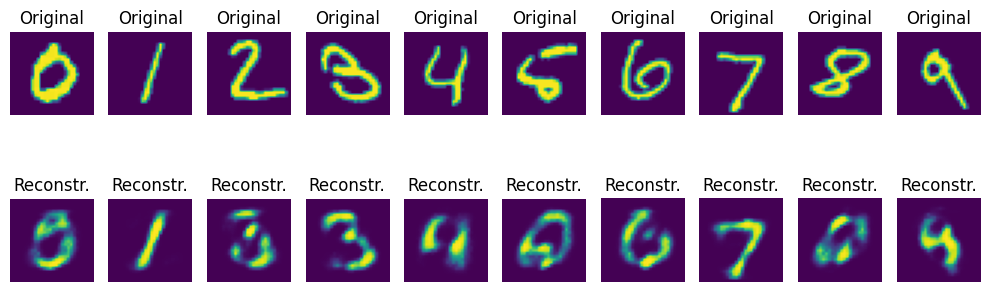

In [ ]:
testImages2 = X_test
testImagesEncoded2 = rbm2.encode(testImages2)
testImagesReconstructed2 = rbm2.reconstruct(testImagesEncoded2)

plt.figure(figsize=(10, 4))
for i in range(10):
  for j, label in enumerate(y_test):
    if i == label:
      plt.subplot(2, 10, i + 1)
      plt.imshow(testImages2[j].reshape(28, 28))
      plt.title("Original")
      plt.axis('off')

      plt.subplot(2, 10, i + 11)
      plt.imshow(testImagesReconstructed2[j].reshape(28, 28))
      plt.title("Reconstr.")
      plt.axis('off')
      break

plt.tight_layout()
plt.show()

Now, we notice that the accuracy in the reconstruction of images done by rbm2 decreases drastically: the shapes are less well-defined and they have a "faded" appearance (most of the digits are difficult to distinguish).

Next, we are going to train classifiers to recognise the MNIST digits that the RBMs have encoded a priori.

## Training the Classifier to Recognize the MNIST Digits

We are going to check the accuracy for both RBMs (rbm1 and rbm2), on two classifiers: Logistic Regression and Support Vector Machines.

1. Logistic Regression

In [ ]:
# Training the Logistic Regression classifier on the images encoded by rbm1:
X_train_encoded1, X_test_encoded1, y_train_encoded1, y_test_encoded1 = train_test_split(testImagesEncoded1, y_test, test_size=0.33, random_state=42)
clf = LogisticRegression(max_iter=1000)
clf.fit(X_train_encoded1, y_train_encoded1)

LogisticRegression(max_iter=1000)

In [ ]:
# Testing the Logistic Regression classifier:
y_pred1 = clf.predict(X_test_encoded1)
accuracy1 = accuracy_score(y_test_encoded1, y_pred1)
print("Accuracy for rbm1:", accuracy1)

Accuracy for rbm1: 0.933939393939394


For the first RBM, the Logistic Regression Classifier recognizes the digits from the dataset  with an accuracy of 0.9339, which is consistent with the plots done at the previous step.

We move on to the second RBM (rbm2):

In [ ]:
# Training the Logistic Regression classifier on the images encoded by rbm2:
X_train_encoded2, X_test_encoded2, y_train_encoded2, y_test_encoded2 = train_test_split(testImagesEncoded2, y_test, test_size=0.33, random_state=42)
clf2 = LogisticRegression(max_iter=1000)
clf2.fit(X_train_encoded2, y_train_encoded2)

LogisticRegression(max_iter=1000)

In [ ]:
# Testing the Logistic Regression classifier:
y_pred2 = clf2.predict(X_test_encoded2)
accuracy2 = accuracy_score(y_test_encoded2, y_pred2)
print("Accuracy for rbm2:", accuracy2)

Accuracy for rbm2: 0.8236363636363636


We notice the drop in accuracy for rbm2 to 0.8236. Its ability to generalize proves to be lower.

2. Support Vector Machine

In [ ]:
from sklearn import svm

In [ ]:
# Training the Support Vector Machine classifier on the images encoded by rbm1:
clf1SVM = svm.SVC()
clf1SVM.fit(X_train_encoded1, y_train_encoded1)

SVC()

In [ ]:
# Testing the Support Vector Machine classifier:
y_pred1SVM = clf1SVM.predict(X_test_encoded1)
accuracy1SVM = accuracy_score(y_test_encoded1, y_pred1SVM)
print("Accuracy for rbm1:", accuracy1SVM)

Accuracy for rbm1: 0.963939393939394


The accuracy for this classifier is greater than the one for the Logistic Regression in what concerns rbm1 (0.9639). Even though SVM is a bit outdated, it appears to be still working pretty well.

We move on to rbm2:

In [ ]:
# Training the Support Vector Machine classifier on the images encoded by rbm2:
clf2SVM = svm.SVC()
clf2SVM.fit(X_train_encoded2, y_train_encoded2)

SVC()

In [ ]:
# Testing the Logistic Regression classifier:
y_pred2SVM = clf2SVM.predict(X_test_encoded2)
accuracy2SVM = accuracy_score(y_test_encoded2, y_pred2SVM)
print("Accuracy for rbm2:", accuracy2SVM)

Accuracy for rbm2: 0.8524242424242424


Even the accuracy for rbm2 is higher than the one given by the Logistic Regression classifier (0.8524). Still pretty low compared to rbm1, but higher than the one given by the Logistic Regression for rbm2.

## Results Summary

- A Restricted Boltzmann Machine with multiple states in the hidden layer performs almost two times better than one with less states in the hidden layer, even if they are trained for the same amount of epochs, and with the same batch size (however, as expected, it takes more time to train the one with multiple hidden states: 2 minutes for rbm1, which had 256 hidden states, compared to 1 minute for rbm2, which had 64 hidden states).

- Training a Logistic Regression Classifier on both of these RBM showcases this difference in the value of the accuracy: for rbm1 (256 hidden states), we get an accuracy of 0.9339, and for rbm2 (64 hidden states) the accuracy is 0.8236; this means that it is able to classify the digits better given the images encoded by rbm1, due to the fact that they are clearer than the ones encoded by rbm2.

- The second classifier, Support Vector Machine, gives even higher accuracies for both of them than Logistic Regression, even though it is older than it.

## Personal Considerations

- At the Contrastive Divergence function in the RBM class, I forgot to add a np. for one of the sums for the variable deltaBiasVisible. When I reviewed the code to get rid of an error I added it and the error per batch lowered even more considerably.

- I was not able to load the dataset from the website provided, as it requested my username and password and the ones for the elearning platform were apparently not valid, so I had to load them in a different way.

- There are so many comments and long variable names because I want to take a look at what I am doing at this course when I go back to Romania and maybe tinker with these midterms a little bit more/use them for some other projects and I want to understand what happened here.

- I had so much fun with this midterm that I wanted to train 2 classifiers and compare performances. I really enjoyed working on it and I understood it quite well!

- I learnt about Support Vector Machine when I was thinking about what other classifier I could use for this task.

- I was talking to my brother, who studies Physics, about this task and he told me that whenever Bolzmann's name appears somewhere (Physics, Phylosophy etc.), he knows that thing is going to be great, and I guess I have to tell him that he was right...
